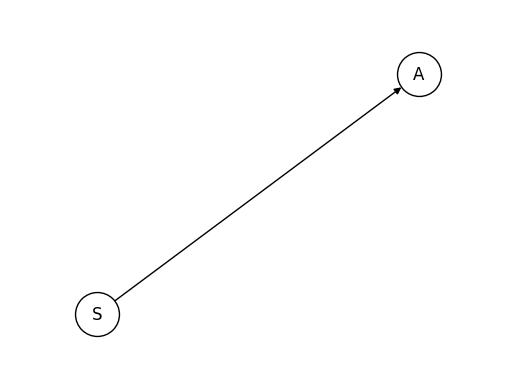

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()


# 
# # explicitly set positions
# pos = {1: (0, 0),
#        2: (-1, 0.3),
#        3: (2, 0.17),
#        4: (4, 0.255), 
#     5: (5, 0.03)}

labels = nx.get_edge_attributes(G,'Heuristic')

options = {
    "font_size": 12,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}


nx.draw_networkx(G, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

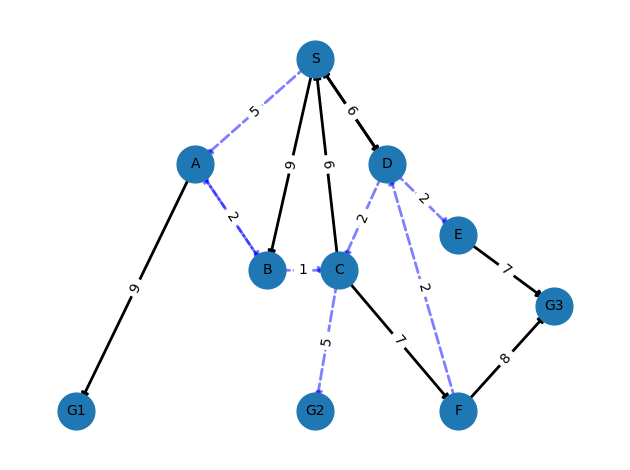

In [106]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_edge("S", "A", weight=5)
G.add_edge("A", "B", weight=3)
G.add_edge("B", "A", weight=2)
G.add_edge("A", "G1", weight=9)
G.add_edge("S", "B", weight=9)
G.add_edge("B", "C", weight=1)
G.add_edge("S", "D", weight=6)
G.add_edge("D", "S", weight=6)
G.add_edge("D", "C", weight=2)
G.add_edge("C", "S", weight=6)
G.add_edge("C", "G2", weight=5)
G.add_edge("C", "F", weight=7)
G.add_edge("D", "E", weight=2)
G.add_edge("E", "G3", weight=7)
G.add_edge("F", "G3", weight=8)
G.add_edge("F", "D", weight=2)

pos = {'S' : (10,10),
        'A': (5, 7),
        'B': (8, 4),
        'C': (11, 4),
        'D': (13, 7), 
        'E': (16, 5),
        'F': (16, 0),
        'G1': (0, 0),
        'G2': (10, 0), 
        'G3': (20, 3)
       
       
       }

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 5]

# pos = nx.spring_layout(G, seed=1)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [107]:
iter_G = G.neighbors(n='D')
[n for n in iter_G]

['S', 'C', 'E']

In [109]:
edge_atr = nx.get_edge_attributes(G, 'weight')
edge_atr

{('S', 'A'): 5,
 ('S', 'B'): 9,
 ('S', 'D'): 6,
 ('A', 'B'): 3,
 ('A', 'G1'): 9,
 ('B', 'A'): 2,
 ('B', 'C'): 1,
 ('C', 'S'): 6,
 ('C', 'G2'): 5,
 ('C', 'F'): 7,
 ('D', 'S'): 6,
 ('D', 'C'): 2,
 ('D', 'E'): 2,
 ('F', 'G3'): 8,
 ('F', 'D'): 2,
 ('E', 'G3'): 7}

In [116]:
[n for n in G.neighbors(n = start_node)]

['A', 'B', 'D']

{'A': 12, 'B': 12, 'D': 12}

{'A': 12, 'B': 12, 'D': 12}

In [123]:
attrs = {'S': {"heuristica": 5},
         'A': {"heuristica": 7},
         'B': {"heuristica": 3},
         'C': {"heuristica": 4},
         'D': {"heuristica": 6},
         'E': {"heuristica": 5},
         'F': {"heuristica": 6},
         'G1': {"heuristica": 0},
         'G2': {"heuristica": 0},
         'G3': {"heuristica": 0},
         }
nx.set_node_attributes(G, attrs)

node_atr = nx.get_node_attributes(G, 'heuristica')
node_atr

{'S': 5,
 'A': 7,
 'B': 3,
 'G1': 0,
 'C': 4,
 'D': 6,
 'G2': 0,
 'F': 6,
 'E': 5,
 'G3': 0}

In [115]:
nx.path_weight(G, path = ['S', 'A'], weight='weight')

5

In [ ]:
def AStar_search(start_node : str, end_node : list, G : "networkx graph"):
    
    edge_atr = nx.get_edge_attributes(G, 'weight')
    node_atr = nx.get_node_attributes(G, 'heuristica')
    end_node = ['G1', 'G2', 'G3']
    

    visited = []
    visited.append(start_node)
    
    curr_weights = {}
    

    curr_node = start_node
    prev_node = start_node
    
    curr_path = 10**10
    shortest_path = 10**10
    
    while curr_node not in end_node:
        # path_list = []
        # neigh_list = []

        
        curr_neighbors = G.neighbors(n = start_node)
        for n in curr_neighbors:
            key = (start_node, n)
            path = edge_atr[key] + node_atr[n]
            # path_list.append(path)
            # neigh_list.append(n)
            curr_weights[n] = path
                
        # path_list.index(min(path_list))
        path_min = min(curr_weights.values())
        new_paths = {node: path for node, path in curr_weights.items() if path == path_min}
        
        for node, path in new_paths.items():
            key = (curr_node, node)
            path = edge_atr[key] + node_atr[node]
            curr_weights[n] = path
        
        visited.append(curr_node)
        
        


In [160]:
def add_path(size, path, dt):
    try:
        dt[size].append(path)
    except:
        dt[size] = [path]

In [136]:
start_node = 'S'
edge_atr = nx.get_edge_attributes(G, 'weight')
node_atr = nx.get_node_attributes(G, 'heuristica')
end_node = ['G1', 'G2', 'G3']


visited = []
visited.append(start_node)

curr_weights = {}


curr_node = start_node
prev_node = start_node

curr_path = 10**10
shortest_path = 10**10

while curr_node not in end_node:
    # path_list = []
    # neigh_list = []

    
    curr_neighbors = G.neighbors(n = start_node)
    for n in curr_neighbors:
        key = (start_node, n)
        path = edge_atr[key] + node_atr[n]
        # path_list.append(path)
        # neigh_list.append(n)
        curr_weights[n] = path
            
    # path_list.index(min(path_list))
    visited.append(curr_node)
    prev_node = curr_node
    
    path_min = min(curr_weights.values())
    
    

KeyboardInterrupt: 

In [141]:
curr_weights

{'A': 12, 'B': 12, 'D': 12}

In [159]:
dt = {}

add_path(1, 'a', dt)
add_path(0, 'b', dt)
add_path(0, 'c', dt)

dt

{1: ['a'], 0: ['b', 'c']}